# Algorithmes non supervisés

In [1]:
import numpy as np
import pandas as pd

## Clustering

### Préparation Titanic

In [2]:
def prepare():
    # Loading
    titanic_df = pd.read_csv("data/titanic_train.csv")

    # New features
    titanic_df['FamilyNb'] = titanic_df['SibSp'] + titanic_df['Parch']
    titanic_df['Alone'] = (titanic_df['FamilyNb'] == 0)

    # Quantification Sex + Embarked
    sex_df = pd.get_dummies(titanic_df['Sex'], prefix='sex', drop_first=True)
    embarked_df = pd.get_dummies(titanic_df['Embarked'], prefix='embarked', dummy_na=True)
    titanic_df = pd.concat([titanic_df, embarked_df, sex_df], axis=1)

    # Delete unused features
    titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'SibSp', 'Parch', 'Sex', 'Embarked'], axis=1, inplace=True)

    # Missing values
    titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

    # Normalization
    titanic_df['Age'] = (titanic_df['Age'] - titanic_df['Age'].min()) / (titanic_df['Age'].max() - titanic_df['Age'].min())
    titanic_df['Alone'] = titanic_df['Alone'].astype('int')
    
    return titanic_df
    
titanic_df = prepare()

### Algorithmes de clustering

In [3]:
# K-Means
from sklearn.cluster import KMeans

clusterAlgo = KMeans(n_clusters=3, random_state=42)
clusterAlgo.fit(titanic_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [4]:
# Cluster centers
clusterAlgo.cluster_centers_

array([[ 3.03538175e-01,  2.40037244e+00,  3.91755100e-01,
        -5.77315973e-15,  1.00000000e+00,  1.58286778e-01,
         1.06145251e-01,  7.31843575e-01,  3.72439479e-03,
         7.65363128e-01],
       [ 1.33333333e-01,  2.83333333e+00,  2.45557991e-01,
         5.76666667e+00,  1.11022302e-16,  0.00000000e+00,
         8.33333333e-02,  9.16666667e-01, -1.73472348e-18,
         4.83333333e-01],
       [ 5.81632653e-01,  2.03401361e+00,  3.49357976e-01,
         1.56462585e+00,  1.66533454e-15,  2.82312925e-01,
         5.10204082e-02,  6.66666667e-01,  7.80625564e-18,
         4.65986395e-01]])

In [5]:
# Inertia
clusterAlgo.inertia_

1687.1239639598116

In [6]:
# Analyze each cluster
titanic_df['label'] = clusterAlgo.labels_
pd.options.display.max_rows = None
titanic_df[['Survived', 'FamilyNb', 'Alone', 'sex_male', 'label']].groupby('label').describe().transpose()

label                    0          1           2
Survived count  537.000000  60.000000  294.000000
         mean     0.303538   0.133333    0.581633
         std      0.460214   0.342803    0.494132
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      0.000000   0.000000    1.000000
         75%      1.000000   0.000000    1.000000
         max      1.000000   1.000000    1.000000
FamilyNb count  537.000000  60.000000  294.000000
         mean     0.000000   5.766667    1.564626
         std      0.000000   1.788539    0.696829
         min      0.000000   4.000000    1.000000
         25%      0.000000   5.000000    1.000000
         50%      0.000000   5.000000    1.000000
         75%      0.000000   6.000000    2.000000
         max      0.000000  10.000000    4.000000
Alone    count  537.000000  60.000000  294.000000
         mean     1.000000   0.000000    0.000000
         std      0.000000   0.000000    0.000000
         min      1.000000   0.000000    0.000000
         25%      1.000000   0.000000    0.000000
         50%      1.000000   0.000000    0.000000
         75%      1.000000   0.000000    0.000000
         max      1.000000   0.000000    0.000000
sex_male count  537.000000  60.000000  294.000000
         mean     0.765363   0.483333    0.465986
         std      0.424167   0.503939    0.499692
         min      0.000000   0.000000    0.000000
         25%      1.000000   0.000000    0.000000
         50%      1.000000   0.000000    0.000000
         75%      1.000000   1.000000    1.000000
         max      1.000000   1.000000    1.000000

In [7]:
titanic_df = prepare()

In [8]:
# Mini Batch K-Means
from sklearn.cluster import MiniBatchKMeans

clusterAlgo = MiniBatchKMeans(n_clusters=3, batch_size=50, random_state=42)
clusterAlgo.fit(titanic_df)

MiniBatchKMeans(batch_size=50, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [9]:
# Inertia
clusterAlgo.inertia_

1699.4344150411077

In [10]:
titanic_df = prepare()

In [11]:
# DBScan
from sklearn.cluster import DBSCAN

clusterAlgo = DBSCAN(eps=1, min_samples=15)
clusterAlgo.fit(titanic_df)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [12]:
clusterAlgo.labels_

array([ 0,  1,  2,  3,  2,  4,  2, -1, -1, -1,  6,  2,  2, -1,  2,  2, -1,
        2, -1,  5,  2,  2,  4,  2, -1, -1,  5, -1,  4,  2,  5,  1,  4,  2,
       -1, -1,  5,  2,  0, -1, -1, -1,  5, -1,  4,  2, -1,  4, -1,  0, -1,
        2,  1,  6, -1,  2,  2,  5, -1, -1,  5, -1, -1, -1,  5, -1,  2,  2,
       -1,  0,  2, -1,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  4,  2,  2,
       -1, -1,  2, -1,  2,  2,  2, -1,  0,  2,  2,  5,  1,  6, -1,  2,  2,
       -1,  2,  0,  2,  2,  2,  2, -1,  2, -1,  2, -1, -1,  2,  4,  0, -1,
       -1, -1,  2, -1,  2, -1, -1,  4,  2, -1,  2,  5,  2, -1,  6,  2,  5,
       -1, -1,  2,  5, -1,  2,  6,  4,  2, -1,  2, -1, -1,  2,  2,  3,  2,
        0,  2, -1,  4,  2,  2, -1,  0,  2,  2,  2, -1, -1,  3, -1,  2,  2,
        2, -1, -1,  2,  5,  0, -1, -1,  2,  2, -1,  5, -1, -1,  6,  2, -1,
        2, -1,  2,  2,  2,  6, -1,  5,  5,  4,  0,  4,  2,  2, -1,  2,  5,
        2, -1,  0,  5,  4,  5,  2,  2,  2,  2, -1,  1,  2,  0,  5,  2,  2,
        2,  2,  2, -1,  2

In [13]:
titanic_df = prepare()

In [14]:
# OPTICS
from sklearn.cluster import OPTICS

clusterAlgo = OPTICS(min_samples=20)
clusterAlgo.fit(titanic_df)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=20, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

## Réduction des dimensions

In [15]:
# Boston dataset
import prepare

train_X, test_X, train_y, test_y = prepare.prepare_boston()

In [16]:
# Decision tree on Boston
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor(max_depth=5, random_state=42, criterion='mse')
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)

regressor.feature_importances_

array([0.09536135, 0.        , 0.00264675, 0.        , 0.03052634,
       0.61468233, 0.00158261, 0.01004725, 0.        , 0.        ,
       0.01073655, 0.00133507, 0.23308175])

In [17]:
# Loading
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_fwf("data/boston.txt", skiprows=22, header=None, names=names)

In [18]:
# PCA
from sklearn.decomposition import PCA

reducAlgo = PCA(n_components=3, random_state=42)
reducAlgo.fit(boston_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
# New axes
reducAlgo.components_

array([[ 1.19590474e-02, -4.36665270e-02,  2.83744889e-02,
        -5.59586177e-05,  4.50286345e-04, -1.17256053e-03,
         8.37463613e-02, -6.30054291e-03, -4.07448437e-04,
         9.50703346e-01,  5.60896510e-03, -2.91616114e-01,
         2.29882703e-02, -2.55631787e-02],
       [-2.68394151e-03,  1.12710551e-03, -4.95491867e-03,
        -1.03019000e-04,  1.72446668e-06,  3.61948092e-04,
        -5.73094984e-03,  3.87751025e-04, -2.57985252e-04,
        -2.92878465e-01, -2.52262969e-03, -9.56053453e-01,
         5.79017684e-03, -8.82505565e-03],
       [-6.70554825e-03,  6.32417452e-01, -8.84197568e-02,
        -9.36684408e-04, -1.80194842e-03,  5.02438619e-03,
        -7.52749041e-01,  3.68343751e-02, -4.96863881e-03,
         9.51130090e-02, -1.16225861e-02, -2.46038588e-02,
        -9.47714829e-02,  7.33119980e-02]])

In [20]:
# Explained variance
reducAlgo.explained_variance_

array([30825.32346157,  6250.11740501,   821.8724105 ])

In [21]:
# Variance ratio
reducAlgo.explained_variance_ratio_

array([0.8053274 , 0.16328753, 0.02147184])

In [22]:
# Total explained variance ratio
sum(reducAlgo.explained_variance_ratio_)

0.9900867668895625

In [23]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

reducAlgo = IncrementalPCA(n_components=3)
reducAlgo.fit(boston_df)

sum(reducAlgo.explained_variance_ratio_)

0.989990136695653

In [24]:
# Boston loading for LDA
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_fwf("data/boston.txt", skiprows=22, header=None, names=names)
y = boston_df['MEDV'].astype(int)
X = boston_df.drop(labels='MEDV', axis=1)

In [25]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, y)

lda.explained_variance_ratio_

array([0.67486674, 0.12789097, 0.04164866])

In [26]:
# Total explained variance ratio
sum(lda.explained_variance_ratio_)

0.844406372922109

### Graphiques PCA vs LDA

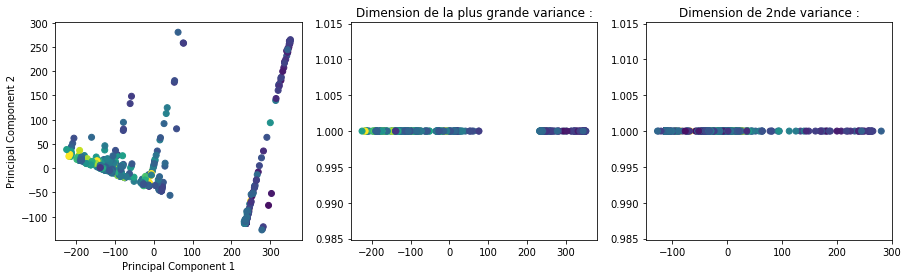

In [27]:
# PCA graph

import matplotlib.pyplot as plt

def graph_acp2(X_PC2, y):
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.scatter(X_PC2[:, 0], X_PC2[:, 1], c=y)
    plt.subplot(1, 3, 2)
    plt.title("Dimension de la plus grande variance :")
    plt.scatter(X_PC2[:, 0], np.ones(X_PC2.shape[0]), c=y)
    plt.subplot(1, 3, 3)
    plt.title("Dimension de 2nde variance :")
    plt.scatter(X_PC2[:, 1], np.ones(X_PC2.shape[0]), c=y)
    plt.show()

pca = PCA(random_state=42, n_components=3)
X_PCA = pca.fit(boston_df).transform(boston_df)
graph_acp2(X_PCA, boston_df['MEDV'])

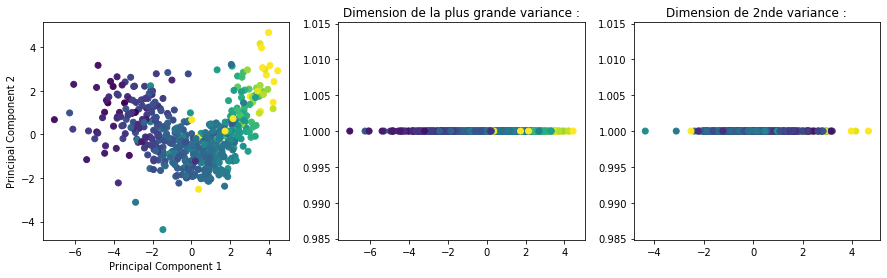

In [28]:
# LDA graph
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_LDA = lda.fit(X, y).transform(X)

graph_acp2(X_LDA, y)